In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
files=files.upload()

Saving SalaryData_Train.csv to SalaryData_Train.csv


In [6]:
s_train = pd.read_csv('SalaryData_Train.csv')

In [7]:
from google.colab import files
files=files.upload()

Saving SalaryData_Test.csv to SalaryData_Test.csv


In [8]:
s_test = pd.read_csv('SalaryData_Test.csv')

In [9]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
s_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
s_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
df = s_train.append(s_test)

<ipython-input-13-d8c21eb6a622>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = s_train.append(s_test)


<ipython-input-19-cc6fa2f053ca>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


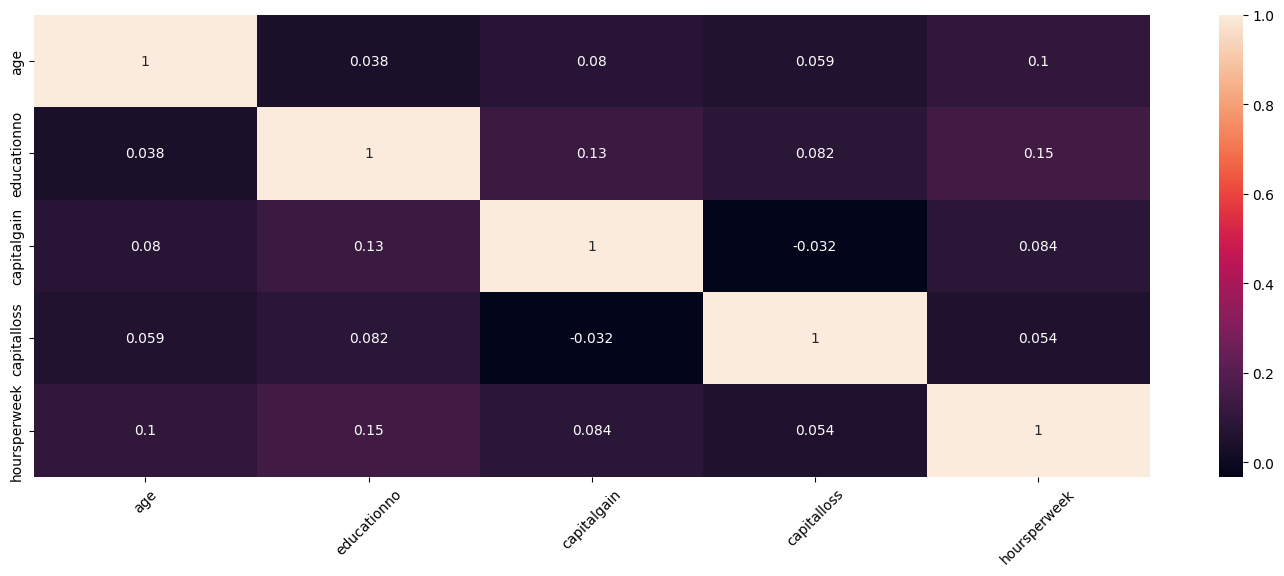

In [19]:
import seaborn as sns
fig= plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True);
plt.xticks(rotation=45);

In [16]:
from sklearn.preprocessing import LabelEncoder
columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]
le=LabelEncoder()
for i in columns:
    s_train[i]=le.fit_transform(s_train[i])
    s_test[i]=le.fit_transform(s_test[i])

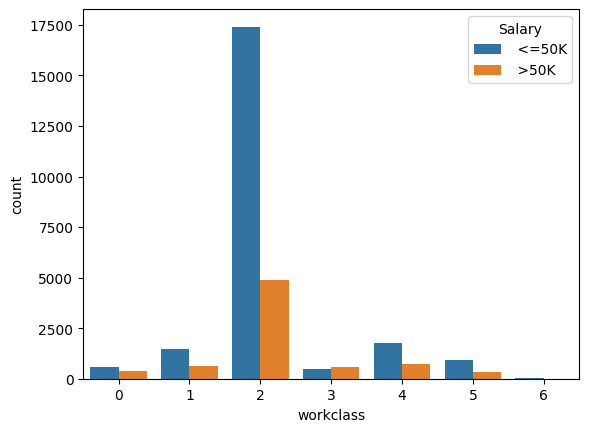

In [18]:
sns.countplot(data=s_train,x='workclass',hue='Salary');

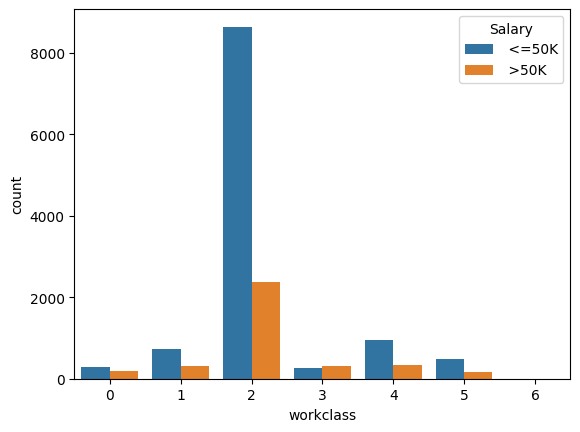

In [21]:
sns.countplot(data= s_test,x='workclass',hue='Salary');

In [22]:
x_train = s_train.iloc[:,0:13]
y_train = s_train.iloc[:,13]
x_test = s_test.iloc[:,0:13]
y_test = s_test.iloc[:,13]

In [23]:
x_train,y_train

(       age  workclass  education  educationno  maritalstatus  occupation  \
 0       39          5          9           13              4           0   
 1       50          4          9           13              2           3   
 2       38          2         11            9              0           5   
 3       53          2          1            7              2           5   
 4       28          2          9           13              2           9   
 ...    ...        ...        ...          ...            ...         ...   
 30156   27          2          7           12              2          12   
 30157   40          2         11            9              2           6   
 30158   58          2         11            9              6           0   
 30159   22          2         11            9              4           0   
 30160   52          3         11            9              2           3   
 
        relationship  race  sex  capitalgain  capitalloss  hoursperweek  n

In [24]:
x_test,y_test

(       age  workclass  education  educationno  maritalstatus  occupation  \
 0       25          2          1            7              4           6   
 1       38          2         11            9              2           4   
 2       28          1          7           12              2          10   
 3       44          2         15           10              2           6   
 4       34          2          0            6              4           7   
 ...    ...        ...        ...          ...            ...         ...   
 15055   33          2          9           13              4           9   
 15056   39          2          9           13              0           9   
 15057   38          2          9           13              2           9   
 15058   44          2          9           13              0           0   
 15059   35          3          9           13              2           3   
 
        relationship  race  sex  capitalgain  capitalloss  hoursperweek  n

<Axes: xlabel='Salary', ylabel='count'>

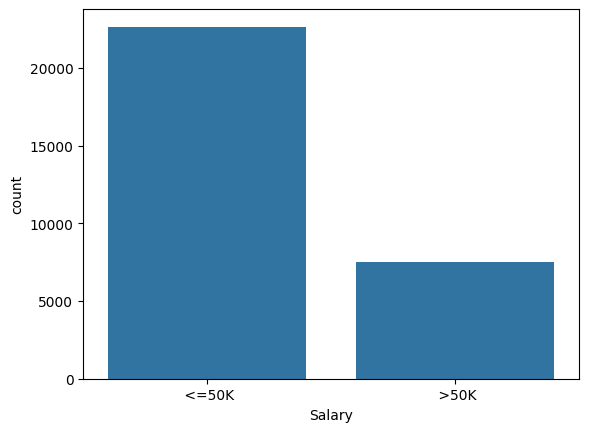

In [25]:
sns.countplot(data=s_train,x='Salary')

# Multinominal

In [27]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
mb = MultinomialNB()
mb.fit(x_train,y_train)
pred_mb = mb.predict(x_test)
pred_mb

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [28]:
a_mb = np.mean(pred_mb==y_test)
a_mb

0.7749667994687915

# Guassian

In [29]:
from sklearn.metrics import pair_confusion_matrix,classification_report,confusion_matrix
def report(model):
    pred = model.predict(x_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,x_test,y_test)

In [31]:
gua = GaussianNB()
gua.fit(x_train,y_train)
pred_gua = gua.predict(x_test)
pred_gua

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [32]:
a_gua = np.mean(pred_gua==y_test)
a_gua

0.7946879150066402